In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread(r'../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread(r'../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread(r'../DATA/solvay_conference.jpg',0)

In [3]:
face_cascade = cv2.CascadeClassifier(r'../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [4]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [9]:
result = detect_face(solvay)

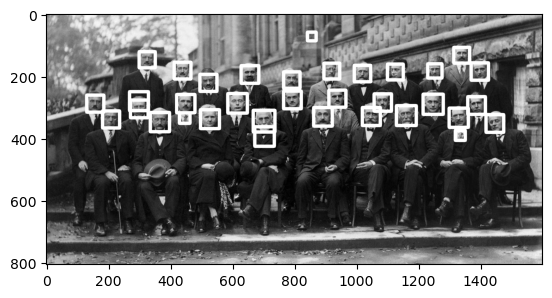

In [10]:
plt.imshow(result,cmap='gray')

In [11]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [12]:
result = adj_detect_face(solvay)

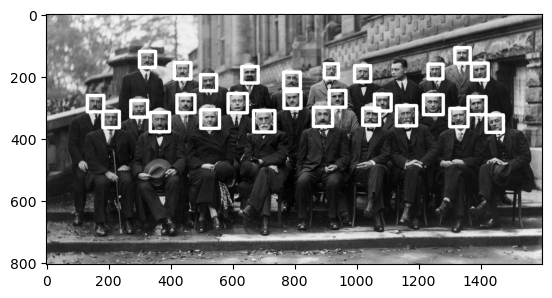

In [13]:
plt.imshow(result,cmap='gray')

In [14]:
eye_cascade = cv2.CascadeClassifier(r'../DATA/haarcascades/haarcascade_eye.xml')

In [17]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

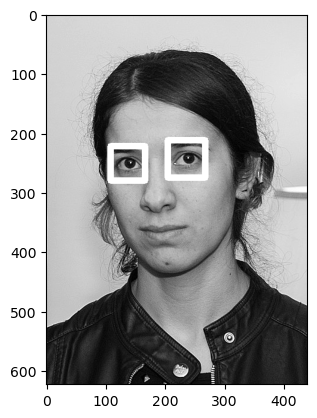

In [18]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

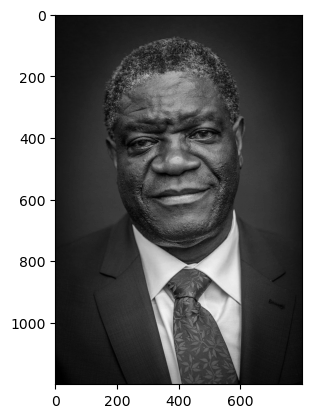

In [19]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [20]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video Face Detect',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    
cap.release()
cv2.destroyAllWindows()